### Installing Virtual Environment For Tensorflow with Apple GPU Support

In [ ]:
# Create a new conda environment
!conda create --name tf_metal python=3.9
!conda activate tf_metal

# Install TensorFlow for Mac M Chip Computers
!conda install -c apple tensorflow-deps
!pip install tensorflow-macos
!pip install tensorflow-metal

In [ ]:
# Ensure that the installation was successful
!pip install matplotlib
!pip install --upgrade tensorflow-macos
!pip install --upgrade tensorflow-metal

In [ ]:
# Check if GPU is in the list of devices
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [1]:
# Alternatively, you can use the following code to check if a GPU is available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Import Packages

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### Downlad Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Create Convolutional Neural Network Model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Ignore the warning 
# "Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support." 
# As long as you see following message in training phase:
# "Plugin optimizer for device_type GPU is enabled."

2024-02-16 18:00:12.589603: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-02-16 18:00:12.589659: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-16 18:00:12.589668: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-16 18:00:12.589736: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-16 18:00:12.589769: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Training

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
# Here in this step we see the message so we successfully run the training with GPU support:
# "Plugin optimizer for device_type GPU is enabled."

Epoch 1/10
   1/1563 [..............................] - ETA: 8:33 - loss: 2.3397 - accuracy: 0.0625

2024-02-16 18:00:58.272077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 12s 8ms/step - loss: 1.5243 - accuracy: 0.4451 - val_loss: 1.2220 - val_accuracy: 0.5607
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1705 - accuracy: 0.5872 - val_loss: 1.1196 - val_accuracy: 0.6072
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0892 - accuracy: 0.6252 - val_loss: 1.1287 - val_accuracy: 0.6113
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1502 - accuracy: 0.6159 - val_loss: 1.0981 - val_accuracy: 0.6315
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4168 - accuracy: 0.5794 - val_loss: 1.9512 - val_accuracy: 0.5022
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.1735 - accuracy: 0.5410 - val_loss: 3.7644 - val_accuracy: 0.4750
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 4.6364 - accuracy: 0.5038 - val_loss: 8.4079 - val_accuracy: 0.4

### Check the Model Performance

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 78.3184 - accuracy: 0.3963 - 932ms/epoch - 3ms/step

Test accuracy: 0.39629998803138733


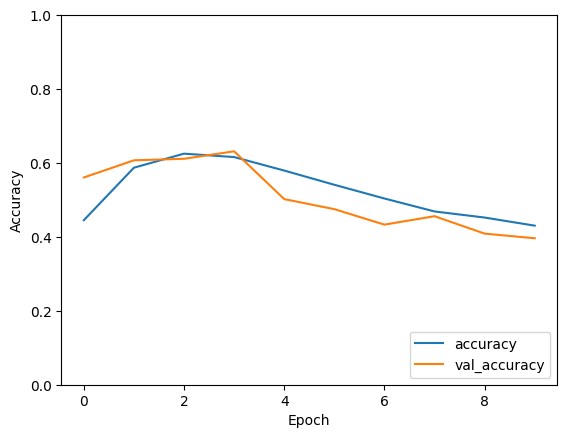

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# For displaying the plot if you are using a notebook environment
plt.show()